# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [1]:
!pip install astroML numpy pandas scipy matplotlib seaborn

# 1. Download the data corresponding to x, y, and σy from http://www.iith.ac.in/~shantanud/testdata.dat. Find the best-fit values after fitting the data to linear, quadratic, and cubic polynomials. Find out which model fits the data best from frequentist model comparison as well as using AIC and BIC. For frequentist model comparison, using the linear model as the null hypothesis, find out the p value corresponding to the preferred model. (or if the linear model is the prefered model, then compare it to the quadratic model). Also show a plot overlaying the data with best fit solutions from linear, quadratic and cubic functions with different line styles for each of the fits. [30 pts]

In [2]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [3]:
# Downloading data from the given link
data_url = "http://www.iith.ac.in/~shantanud/testdata.dat"
data = np.loadtxt(data_url)
data

array([[ 4.17022005e-01,  1.21328306e-01,  1.00000000e-01],
       [ 7.20324493e-01,  8.49527236e-01,  1.00000000e-01],
       [ 1.14374817e-04, -1.01701406e+00,  1.00000000e-01],
       [ 3.02332573e-01, -3.91715712e-01,  1.00000000e-01],
       [ 1.46755891e-01, -6.80729552e-01,  1.00000000e-01],
       [ 9.23385948e-02, -7.48514873e-01,  1.00000000e-01],
       [ 1.86260211e-01, -7.02848629e-01,  1.00000000e-01],
       [ 3.45560727e-01, -7.49939589e-02,  1.00000000e-01],
       [ 3.96767474e-01,  4.11184491e-02,  1.00000000e-01],
       [ 5.38816734e-01,  4.18206375e-01,  1.00000000e-01],
       [ 4.19194514e-01,  1.04198665e-01,  1.00000000e-01],
       [ 6.85219500e-01,  7.71591979e-01,  1.00000000e-01],
       [ 2.04452250e-01, -5.61583801e-01,  1.00000000e-01],
       [ 8.78117436e-01,  1.43374816e+00,  1.00000000e-01],
       [ 2.73875932e-02, -9.71263541e-01,  1.00000000e-01],
       [ 6.70467510e-01,  8.43497249e-01,  1.00000000e-01],
       [ 4.17304802e-01, -6.04131724e-02

In [4]:
# Splitting the data to x, y, and σy
x, y, sigma_y = data[:, 0], data[:, 1], data[:, 2]

In [5]:
# Define Linear Model
def linear_model(x, a, b):
    return a * x + b

# Fit Linear Model
linear_params, linear_cov = curve_fit(linear_model, x, y, sigma=sigma_y)
print(linear_params)
print("\n")
print(linear_cov)

[ 2.79789861 -1.11028082]


[[ 0.00536154 -0.00196919]
 [-0.00196919  0.00103739]]


In [6]:
# Define Quadratic Model
def quadratic_model(x, a, b, c):
    return a * x**2 + b * x + c

# Fit Quadratic Model
quadratic_params, quadratic_cov = curve_fit(quadratic_model, x, y, sigma=sigma_y)
print(quadratic_params)
print("\n")
print(quadratic_cov)

[ 0.50261293  2.38475187 -1.05578915]


[[ 0.07782716 -0.06397375  0.00843777]
 [-0.06397375  0.05735306 -0.00868657]
 [ 0.00843777 -0.00868657  0.00183711]]


In [7]:
# Define Cubic Model
def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit Cubic Model
cubic_params, cubic_cov = curve_fit(cubic_model, x, y, sigma=sigma_y)
print(cubic_params)
print("\n")
print(cubic_cov)

[-0.96724992  1.74451332  1.97184055 -1.02910462]


[[ 1.29254332 -1.65956072  0.55177644 -0.03565873]
 [-1.65956072  2.20990503 -0.77348346  0.05436113]
 [ 0.55177644 -0.77348346  0.29384916 -0.02405245]
 [-0.03565873  0.05436113 -0.02405245  0.0028512 ]]


In [8]:
n = len(x)
k_linear = 2
k_quadratic = 3
k_cubic = 4

# Frequentist model comparison ( using the chi-square distribution )
linear_chi2 = np.sum(((y - linear_model(x, *linear_params)) / sigma_y)**2)
quadratic_chi2 = np.sum(((y - quadratic_model(x, *quadratic_params)) / sigma_y)**2)
cubic_chi2 = np.sum(((y - cubic_model(x, *cubic_params)) / sigma_y)**2)

# Calculate AIC
AIC_linear = n * np.log(linear_chi2 / n) + 2 * k_linear
AIC_quadratic = n * np.log(quadratic_chi2 / n) + 2 * k_quadratic
AIC_cubic = n * np.log(cubic_chi2 / n) + 2 * k_cubic

# Calculate BIC
BIC_linear = n * np.log(linear_chi2 / n) + k_linear * np.log(n)
BIC_quadratic = n * np.log(quadratic_chi2 / n) + k_quadratic * np.log(n)
BIC_cubic = n * np.log(cubic_chi2 / n) + k_cubic * np.log(n)


In [9]:
# Model comparison
preferred_model = np.argmin([AIC_linear, AIC_quadratic, AIC_cubic])

# Calculate p-value
if preferred_model == 0:  # If linear model is preferred
    p_value = 1 - chi2.cdf(linear_chi2, n - k_linear)
elif preferred_model == 1:  # If quadratic model is preferred
    p_value = 1 - chi2.cdf(quadratic_chi2, n - k_quadratic)
else:  # If cubic model is preferred
    p_value = 1 - chi2.cdf(cubic_chi2, n - k_cubic)


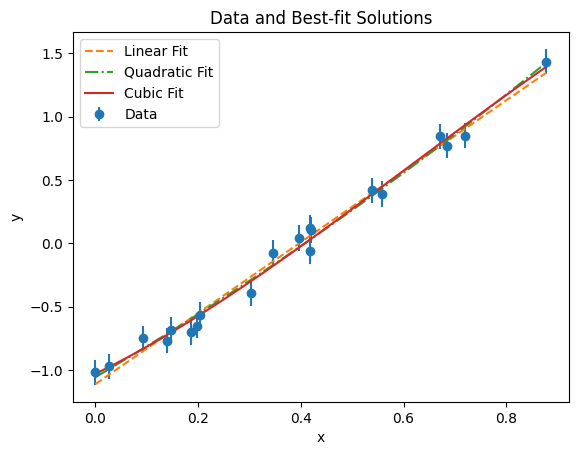

In [10]:
# Plot the data for different models
plt.errorbar(x, y, yerr=sigma_y, fmt='o', label='Data')

x_smooth = np.linspace(min(x), max(x), 100)

plt.plot(x_smooth, linear_model(x_smooth, *linear_params), label='Linear Fit', linestyle='--')
plt.plot(x_smooth, quadratic_model(x_smooth, *quadratic_params), label='Quadratic Fit', linestyle='-.')
plt.plot(x_smooth, cubic_model(x_smooth, *cubic_params), label='Cubic Fit', linestyle='-')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Best-fit Solutions')
plt.show()


In [11]:
print(f"Preferred Model (0: Linear, 1: Quadratic, 2: Cubic): {preferred_model}")
print(f"\nAIC Linear: {AIC_linear}, AIC Quadratic: {AIC_quadratic}, AIC Cubic: {AIC_cubic}")
print(f"\nBIC Linear: {BIC_linear}, BIC Quadratic: {BIC_quadratic}, BIC Cubic: {BIC_cubic}")
print(f"\nP-value of the preffered model: {p_value}")

Preferred Model (0: Linear, 1: Quadratic, 2: Cubic): 1

AIC Linear: -7.402357589910563, AIC Quadratic: -8.897144356361636, AIC Cubic: -7.782054848830587

BIC Linear: -5.410893042802582, BIC Quadratic: -5.909947535699663, BIC Cubic: -3.7991257546146233

P-value of the preffered model: 0.9234043003657486


# 2. For the model comparison problem shown in class on JVDP’s blog, calculate AIC and BIC for the linear and quadratic models. Do these results agree with the frequentist model comparison results shown on the blog? Also mention the qualitative significance using strengt of evidence rules. [10 pts]

In [12]:
import numpy as np
from sklearn.metrics import mean_squared_error

#get data from website
data1 = np.array([[ 0.42,  0.72,  0.  ,  0.3 ,  0.15,
                   0.09,  0.19,  0.35,  0.4 ,  0.54,
                   0.42,  0.69,  0.2 ,  0.88,  0.03,
                   0.67,  0.42,  0.56,  0.14,  0.2  ],
                 [ 0.33,  0.41, -0.22,  0.01, -0.05,
                  -0.05, -0.12,  0.26,  0.29,  0.39,
                   0.31,  0.42, -0.01,  0.58, -0.2 ,
                   0.52,  0.15,  0.32, -0.13, -0.09 ],
                 [ 0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1 ,
                   0.1 ,  0.1 ,  0.1 ,  0.1 ,  0.1  ]])

x1, y1, sigma_y1 = data1

In [13]:
# Fit the data to different polynomial models
def calculate_aic(y_true, y_pred, num_params):
    mse = mean_squared_error(y_true, y_pred)
    n = len(y_true)
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(y_true, y_pred, num_params):
    mse = mean_squared_error(y_true, y_pred)
    n = len(y_true)
    bic = n * np.log(mse) + num_params * np.log(n)
    return bic


popt_linear, _ = curve_fit(linear_model, x1, y1)
popt_quadratic, _ = curve_fit(quadratic_model, x1, y1)

#calculate AIC and BIC for linear and quadratic model
linear_aic = calculate_aic(y, linear_model(x1, *popt_linear), 2)
quadratic_aic = calculate_aic(y, quadratic_model(x1, *popt_quadratic), 3)

linear_bic = calculate_bic(y, linear_model(x1, *popt_linear), 2)
quadratic_bic = calculate_bic(y, quadratic_model(x1, *popt_quadratic), 3)

print("AIC values:")
print("Linear:", linear_aic)
print("Quadratic:", quadratic_aic)

print("BIC values:")
print("Linear:", linear_bic)
print("Quadratic:", quadratic_bic)



# Here, AIC and BIC both are lowest for LINEAR model. Thus, Linear model is the best fit of the
# given data based on AIC and BIC score which also agrees with the frequentist model comparison
# done in the JVDP’s blog

AIC values:
Linear: -23.17778629549587
Quadratic: -20.95957763370085
BIC values:
Linear: -21.18632174838789
Quadratic: -17.972380813038875


In [14]:
 #Strength of evidence
print("change in AIC: ",abs(linear_aic-quadratic_aic))
print("change in BIC: ",abs(linear_bic-quadratic_bic))

# Change in AIC is between 0-3, so strength of evidence is Substantial.
# Change in BIC is between 3-6, so strength of evidence is Positive.


change in AIC:  2.218208661795021
change in BIC:  3.213940935349015


# 3. Find out one paper in research literature which uses the Kolmogorov-Smirnov test and explain briefly how it was used in that paper. Is K-S test used incorrectly (in this paper) as per the warnings on the Penn State website discussed in class? [10 pts] (Hint : Use google scholar or enter “Kolmogorov-Smirnov” or “K-S” test in the abstract tab in the astro-ph or hep-ex section of arXiv. Also indicate the paper reference.)

In [15]:
"""

Title : The local environment of flat galaxies

The paper discusses the local environment of flat galaxies and compares it with non-flat galaxies using statistical methods, including the Kolmogorov-Smirnov (KS) test1. Here are the key points:

Flat vs Non-Flat Galaxies: The study finds that flat galaxies are located in sparser environments compared to non-flat galaxies, with a significant difference in their geometrical environments.

Superthin Galaxies: A subset of flat galaxies, known as superthin galaxies, are also analyzed2. They are found to reside in under-dense environments compared to other flat galaxies3.

Kolmogorov-Smirnov Test: The KS test is used to statistically confirm that the local environments of superthin and non-superthin galaxies are significantly different4. This test is crucial for validating the hypothesis that the local environment affects galaxy formation and evolution.

Implications: The findings may have important implications for understanding the formation and evolution models of flat galaxies, including the role of the local environment in shaping their structure. The KS test’s importance lies in its ability to provide statistical evidence for the differences in local environments between different types of galaxies.




Is K-S test used incorrectly (in this paper) as per the warnings on the Penn State website ?

    No, The sampling is correctly used and complies with below points ( Though the paper does not uses AD test).

    Sensitivity of KS Test: The KS test is often insensitive in detecting differences between distributions, especially when deviations occur frequently or near the ends of distributions. The AD test, being a weighted version of the Cramer-von Mises (CvM) test, overcomes these limitations and offers greater sensitivity.

    Inappropriateness of KS Test Probabilities: KS test probabilities become inaccurate when the model is derived from the dataset itself. The test assumes independence between the curves, which is violated when the model is fit to the same dataset. In such cases, bootstrap resampling provides a more reliable estimation of significance levels.

    Inapplicability in Multiple Dimensions: EDF-based tests, including KS and AD tests, cannot be directly applied in two or more dimensions due to the absence of a unique ordering of points. While some multidimensional statistics can be constructed, their critical values are not distribution-free, and bootstrap resampling is suggested for significance level estimation.

    The recommendation is to replace the KS test with the more sensitive AD test, using tabulated critical values for comparisons with independent datasets or preselected models. Additionally, caution is advised when interpreting tabulated probabilities, and bootstrap resampling should be employed to confirm the distribution of the test statistic. This cautious approach also extends to constructing ad hoc statistics related to the KS test in multiple dimensions.


Source : https://arxiv.org/pdf/2109.13526.pdf

"""

'\n\nTitle : The local environment of flat galaxies\n\nThe paper discusses the local environment of flat galaxies and compares it with non-flat galaxies using statistical methods, including the Kolmogorov-Smirnov (KS) test1. Here are the key points:\n\nFlat vs Non-Flat Galaxies: The study finds that flat galaxies are located in sparser environments compared to non-flat galaxies, with a significant difference in their geometrical environments.\n\nSuperthin Galaxies: A subset of flat galaxies, known as superthin galaxies, are also analyzed2. They are found to reside in under-dense environments compared to other flat galaxies3.\n\nKolmogorov-Smirnov Test: The KS test is used to statistically confirm that the local environments of superthin and non-superthin galaxies are significantly different4. This test is crucial for validating the hypothesis that the local environment affects galaxy formation and evolution.\n\nImplications: The findings may have important implications for understandin

# 4

• Calculate the significance in terms of no of sigmas of the Higgs boson discovery claim from the p value given in the abstract of the ATLAS discovery paper, arXiv:1207.7214.

In [16]:
from scipy.stats import norm

p_higgs = 1.7e-9
significance_higgs = norm.isf(p_higgs)  # Inverse survival function
print("Significance of Higgs Boson Discovery:", significance_higgs, "sigmas")

# This value matches with the abstract's value of "significance of ≈5.9 standard deviations "

Significance of Higgs Boson Discovery: 5.911017938341624 sigmas


• Do the same for the LIGO discovery of GW150914, for which the p
value = 2 × 10−7 . (Hint : look up norm.isf)

In [17]:
from scipy.stats import norm

p_ligo = 2e-7
significance_ligo = norm.isf(p_ligo)  # Inverse survival function
print("Significance of LIGO Discovery of GW150914:", significance_ligo, "sigmas")

# This value matches with the LIGO discovery of GW150914 value of "significance of ≈5.1 standard deviations "

Significance of LIGO Discovery of GW150914: 5.068957749717791 sigmas


• From the Super-K discovery paper for neutrino oscillations (hep-
ex/9807003), calculate the χ2 GOF using the best-fit νμ ↔ ντ os-
cillation solution. (Hint : check page 4 of the paper, second column,last paragraph)

In [18]:
# Assuming the chi-square value and degrees of freedom are provided in the Super-K Discovery paper
chi_square = 65.2
dof = 67

# Calculate the chi-square goodness-of-fit
chi_square_gof = chi_square / dof
print("Chi-square Goodness-of-fit ( From the Super-K discovery paper ) for Neutrino Oscillations:", chi_square_gof)


Chi-square Goodness-of-fit ( From the Super-K discovery paper ) for Neutrino Oscillations: 0.973134328358209


In [19]:
from scipy.stats import chi2

# Given chi-square GOF value
chi2_GOF = 65.2
DOF = 67
p_value = 1 - chi2.cdf(chi2_GOF, DOF)

# Print the p-value
print("Chi-square goodness of fit: ", p_value)

Chi-square goodness of fit:  0.5394901931099038
